# Arithmetic and Logical Operations on Images

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

## Image Region Extraction

### cropped_img_array = image_array[rows,columns,channel]

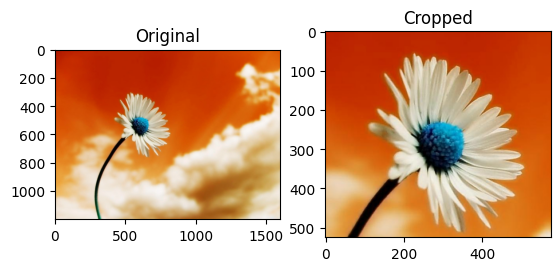

In [2]:
img = cv.imread("images/3.jpg", cv.IMREAD_COLOR)

cropped_img = img[250:775, 310:885]  # rows, cols

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img)

plt.subplot(1,2,2)
plt.title("Cropped")
plt.imshow(cropped_img)

plt.show()

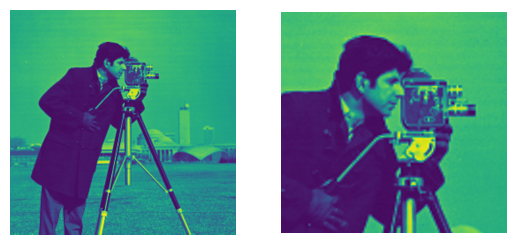

In [3]:
img = cv.imread("images/cameraman.tif", cv.IMREAD_GRAYSCALE)

cropped = img[50:280, 135:370]

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(cropped)
plt.axis('off')
plt.show()

In [4]:
img = cv.imread("images/messi.jpg", cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

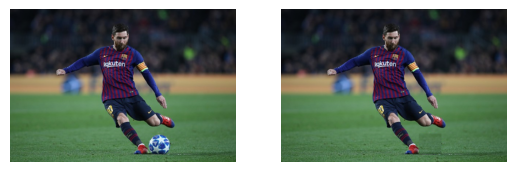

In [5]:
x1, x2 = 378, 440
y1, y2 = 342, 398

shift_x = 120

croppedGrass = img[y1:y2, x1+shift_x:x2+shift_x]

img_ = img.copy()
img_[342:398,378:440] = croppedGrass

plt.subplot(1,2,1)
plt.imshow(img)
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img_)
plt.axis('off')
plt.show()

## Image Resizing

### resized_img = cv2.resize(image, dsize=(width,height))

In [6]:
img = cv.imread("images/3.jpg", cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

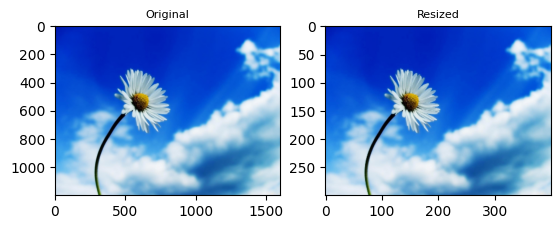

In [7]:
scaleParent = 25

new_width = int(img.shape[1] * scaleParent / 100)
new_height = int(img.shape[0] * scaleParent / 100)

resized = cv.resize(img, dsize=(new_width, new_height))

plt.subplot(1,2,1)
plt.title("Original", fontsize=8)
plt.imshow(img)

plt.subplot(1,2,2)
plt.title("Resized", fontsize=8)
plt.imshow(resized)
plt.show()

In [8]:
print(img.shape)
print(resized.shape)

(1200, 1600, 3)
(300, 400, 3)


## Splitting

### r, g, b = cv2.split(color_image)

In [9]:
img = cv.imread("images/3.jpg", cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

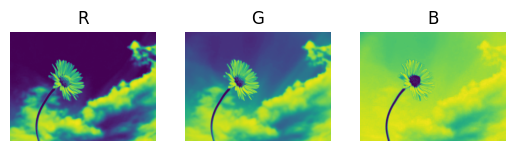

In [10]:
r, g, b = cv.split(img)

images = [r, g, b]
titles = ["R", "G", "B"]

for i in range(len(titles)):
    plt.subplot(1,3,i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

## Merging

### merged_img = cv2.merge((b,g,r))

In [11]:
img = cv.imread("images/3.jpg", cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
r, g, b = cv.split(img)

In [14]:
r_ = r.copy()
g_ = g.copy()
b_ = b.copy()

r_[:] = 0   # or r_[:,:] = 0
g_[:] = 0
b_[:] = 0

red = cv.merge((r, g_, b_))
green = cv.merge((r_, g, b_))
blue = cv.merge((r_, g_, b))

redRemoved = cv.merge((r_, g, b))
greenRemoved = cv.merge((r, g_, b))
blueRemoved = cv.merge((r, g, b_))

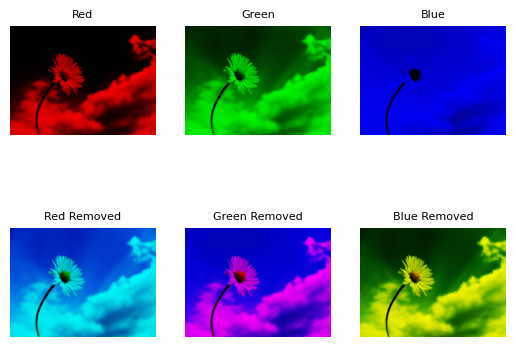

In [15]:
images = [red, green, blue, redRemoved, greenRemoved, blueRemoved]
titles = ["Red", "Green", "Blue", "Red Removed", "Green Removed", "Blue Removed"]

for i in range(len(titles)):
    plt.subplot(2,3,i+1)
    plt.title(titles[i], fontsize=8)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

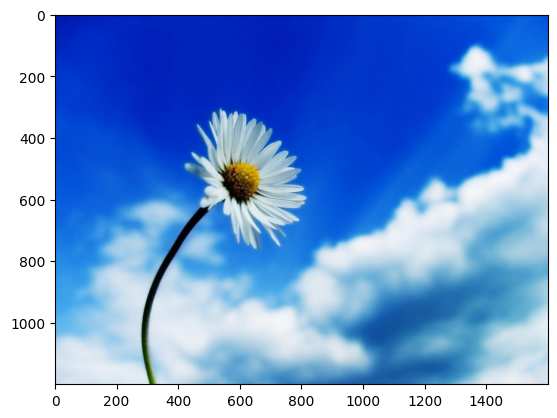

In [16]:
plt.imshow(green + greenRemoved)
plt.show()

## Arithmetic Operations

### • Addition
          cv2.add(img_1, img_2)
          cv2.addWeighted(img_1, img1_wgt, img_2, img2_wgt, gamma_val)

### • Subtraction
          cv2.subtract(img_1, img_2)

### • Multiplication
          cv2.multiply(img_1, img_2)

### • Division
          cv2.divide(img_1, img_2)

In [17]:
img1 = cv.imread("images/scr3.jpg", cv.IMREAD_GRAYSCALE)
img2 = cv.imread("images/scr4.jpg", cv.IMREAD_GRAYSCALE)

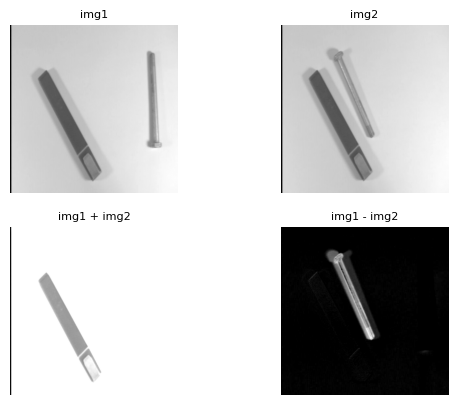

In [18]:
add = cv.add(img1, img2)
subtract = cv.subtract(img1, img2)
multiply = cv.multiply(img1, img2)
division = cv.divide(img1, img2)

images = [img1, img2, add, subtract]
titles = ["img1", "img2", "img1 + img2", "img1 - img2"]

for i in range(len(titles)):
    plt.subplot(2,2,i+1)
    plt.title(titles[i], fontsize=8)
    plt.imshow(images[i],'gray')
    plt.axis('off')
plt.show()

In [19]:
img1 = cv.imread("images/3.jpg", cv.IMREAD_COLOR)
img2 = cv.imread("images/OpenCV_Logo.jpg", cv.IMREAD_COLOR)

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

# Resize if not the same size
img1 = cv.resize(img1, (img2.shape[1],img2.shape[0]))

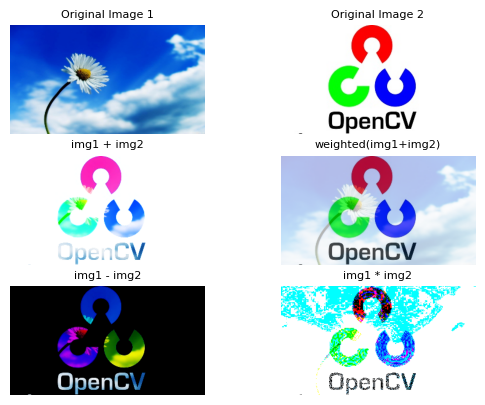

In [20]:
addition = cv.add(img1,img2)
weighted_add = cv.addWeighted(img1, 0.3, img2, 0.7, 0)
subtraction = cv.subtract(img1, img2)
multiplication = cv.multiply(img1, img2)

images = [img1, img2, addition, weighted_add, subtraction, multiplication]
titles = ["Original Image 1", "Original Image 2", "img1 + img2", "weighted(img1+img2)",
         "img1 - img2", "img1 * img2"]

for i in range(len(titles)):
    plt.subplot(3,2,i+1)
    plt.title(titles[i], fontsize=8)
    plt.imshow(images[i],'gray')
    plt.axis('off')
plt.show()

## Logical Operations

### • AND
          cv2.bitwise_and(img_1, img_2)

### • OR
          cv2.bitwise_or(img_1, img_2)

### • NOT
          cv2.bitwise_not(img_1)

### • XOR
          cv2.bitwise_xor(img_1, img_2)

In [23]:
img1 = cv.imread("images/3_.jpg", cv.IMREAD_COLOR)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

img2 = cv.imread("images/mask_single.jpg", cv.IMREAD_COLOR)

In [24]:
print(img1.shape)
print(img2.shape)

(300, 400, 3)
(300, 400, 3)


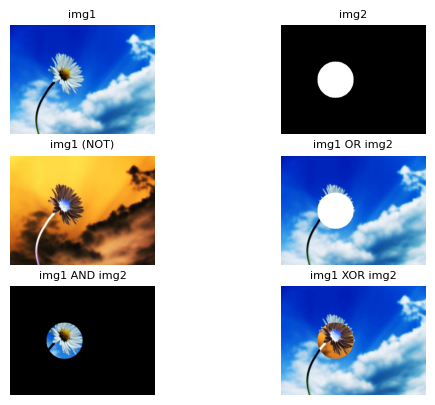

In [25]:
not_img = cv.bitwise_not(img1)
or_img = cv.bitwise_or(img1, img2)
and_img = cv.bitwise_and(img1, img2)
xor_img = cv.bitwise_xor(img1, img2)

images = [img1, img2, not_img, or_img, and_img, xor_img]
titles = ["img1", "img2", "img1 (NOT)", "img1 OR img2", "img1 AND img2", 
          "img1 XOR img2"]

for i in range(len(titles)):
    plt.subplot(3,2,i+1)
    plt.title(titles[i], fontsize=8)
    plt.imshow(images[i],'gray')
    plt.axis('off')
plt.show()

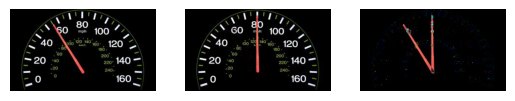

In [26]:
img1 = cv.imread("images/meter1.jpg", cv.IMREAD_COLOR)
img2 = cv.imread("images/meter2.jpg", cv.IMREAD_COLOR)

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)

img3 = cv.bitwise_xor(img1, img2)
#img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)

images = [img1, img2, img3]

for i in range(len(images)):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

## Masking

In [27]:
img = cv.imread("images/3_.jpg", cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

mask = cv.imread("images/mask_single.jpg", cv.IMREAD_COLOR)

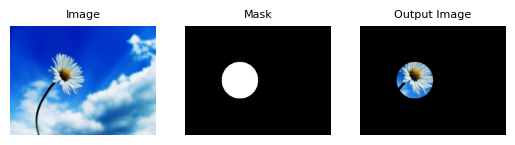

In [28]:
output = cv.bitwise_and(img, mask)

images = [img, mask, output]
titles = ["Image", "Mask", "Output Image"]

for i in range(len(titles)):
    plt.subplot(1,3,i+1)
    plt.title(titles[i], fontsize=8)
    plt.imshow(images[i],'gray')
    plt.axis('off')
plt.show()